# FuelConsumptionCo2

WorkFlow
We will first perform the following steps:

* Data wrangling
* Exploratory Data Analysis & Visualizations
* Model Selection & Evaluation

**Data Wrangling**

*We will imported Pandas and Numpy library and then we will open our dataset which is in csv format using the pd.read_csv() method of Pandas. After that we will check the first 5 rows of our dataframe.*

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("E:/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Identifying the missing values**

We have used the above code to detect if there are any missing values which are being represented by either '?' or blank cell.

In [2]:
flag = False
for i in df.columns.tolist():
    if ('?' in df[i].tolist() or '' in df[i].tolist()):
        flag = True
print(flag)

False


We will now use the df.isnull() method to check if there are 'NaN' (Not a number) or null values in the cells. This method return True if there are such values otherwise false. Let us have a look at the dataframe which will be created.

In [4]:
tmp = df.isnull()
tmp.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


We will use the value_counts() method to to check the frequency of the values in each column.

In [5]:
for i in tmp.columns.tolist():
    print(tmp[i].value_counts())
    print('')

False    1067
Name: MODELYEAR, dtype: int64

False    1067
Name: Brands, dtype: int64

False    1067
Name: VEHICLECLASS, dtype: int64

False    1067
Name: ENGINESIZE, dtype: int64

False    1067
Name: CYLINDERS, dtype: int64

False    1067
Name: TRANSMISSION, dtype: int64

False    1067
Name: FUELTYPE, dtype: int64

False    1067
Name: FUELCONSUMPTION_CITY, dtype: int64

False    1067
Name: FUELCONSUMPTION_HWY, dtype: int64

False    1067
Name: FUELCONSUMPTION_COMB, dtype: int64

False    1067
Name: FUELCONSUMPTION_COMB_MPG, dtype: int64

False    1067
Name: CO2EMISSIONS, dtype: int64



As we can see, we have got no result with 'True' in it.Therefore our Data is clean.

**We will now use the df.info() method to get the better idea of our dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   Brands                    1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 100.2+ KB


As mentioned, we have 13 Data Columns(Features), followed by name of the column, no of entries in it, null values if any and the data type.


# Exploratory Data Analysis & Visualizations

We will now employ the use of df.describe() method, which will compute the basic statistics for all continuous variables.

The result will contain the following things:

* the count or frequency.
* the mean or average.
* the standard deviation (std).
* the minimum value
* the IQR (Interquartile Range: 25%, 50% and 75%)
* the maximum value

In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


After that we will now use df.describe() method with an additional argument in it " include = 'all' " , which will compute the basic statistics for all continuous variables as well as some statistics for the categorical variables.

We will have few additional things:

* The number of unique values (unique)
* The most frequent value (top)
* The frequency of the top element (freq)

In [8]:
df.describe(include='all')

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,MID_SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


**Correlation**

A mutual interdependence between two or more things is known as correlation.

We will now check the Correlation between the continuous variables using the df.corr() method.

In [9]:
tmp = df.corr()
tmp

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


Now, in this code snippet, we will get the names of only those columns whose absolute value is correlated to CO2EMISSIONS by greater than 50%.

In [12]:
imp_cols = tmp[abs(tmp['CO2EMISSIONS']) > 0.5].index.tolist()
imp_cols

['ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

# Heat Map
We will draw the heatmap of the important columns below.

<AxesSubplot:>

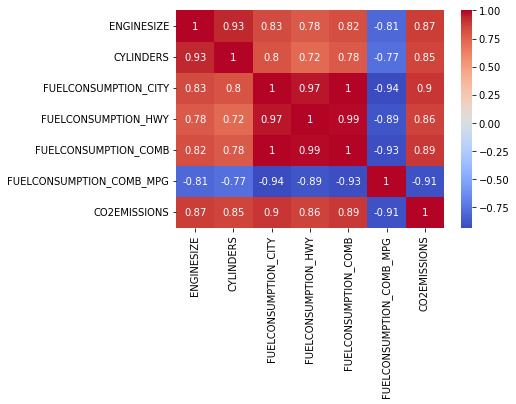

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df[imp_cols].corr(),cmap='coolwarm',annot=True)

We will now use some Visualization methods to check if some of the continuous values are important. We will use the Pairplot to check that.

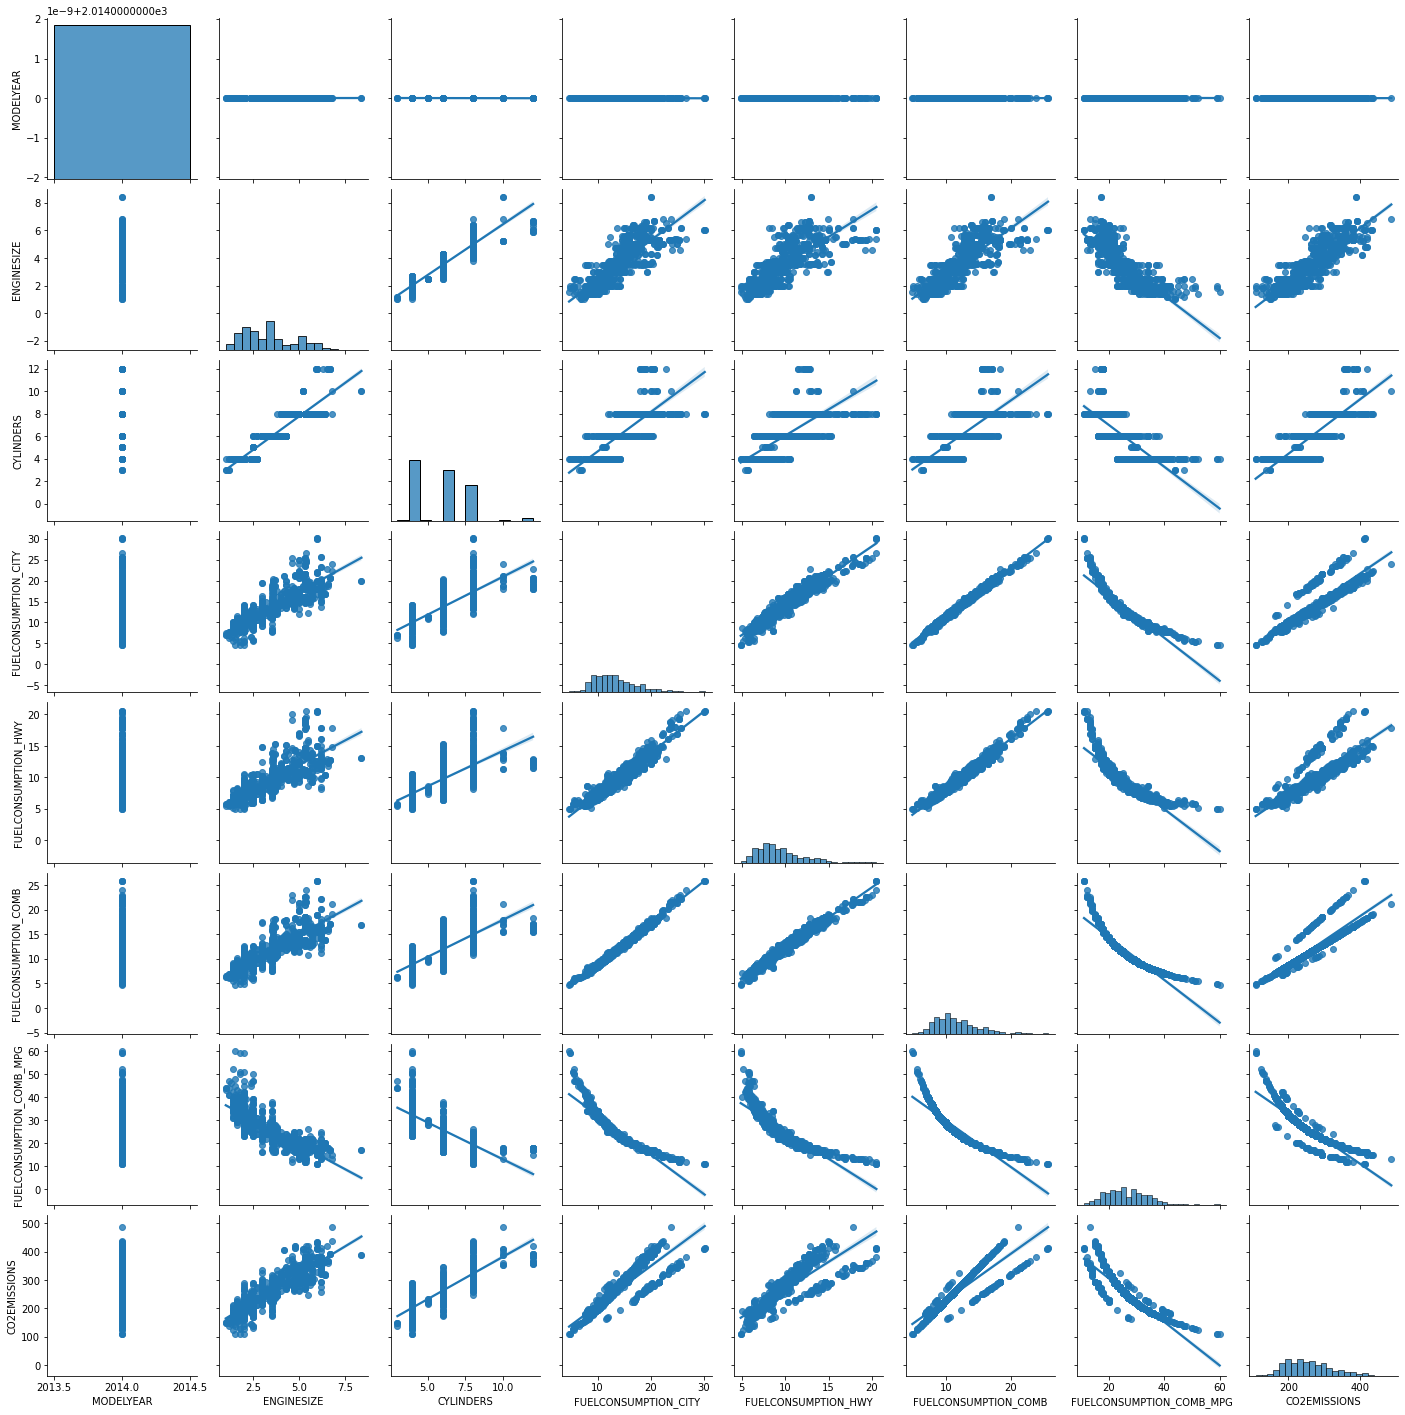

In [14]:
sns.pairplot(df, kind="reg")
plt.show()

Comparing them with the CO2EMISSIONS which is the last row, we can see that:

* 'MODELYEAR' has got no impact on the said column.
* 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY' are having a strong positive correlation.
* We will 'FUELCONSUMPTION_COMB' into account which is the combination of both highway and city fuel consumption

**Pearson Correlation**

In order to use perasonr() funtion, we will use the following statement.

In [15]:
from scipy import stats

In [16]:
for i in imp_cols:
    c , p = stats.pearsonr(df[i],df['CO2EMISSIONS'])
    print("correlation coefficient of " + str(i) + " " + str(c)+ " P value : " + str(p))

correlation coefficient of ENGINESIZE 0.8741543683958106 P value : 0.0
correlation coefficient of CYLINDERS 0.849684592014115 P value : 2.7709372039820494e-298
correlation coefficient of FUELCONSUMPTION_CITY 0.8980385119353932 P value : 0.0
correlation coefficient of FUELCONSUMPTION_HWY 0.861747944897043 P value : 3.9186556e-316
correlation coefficient of FUELCONSUMPTION_COMB 0.8921285933157564 P value : 0.0
correlation coefficient of FUELCONSUMPTION_COMB_MPG -0.906394229522615 P value : 0.0
correlation coefficient of CO2EMISSIONS 0.9999999999999991 P value : 0.0


As we can see all of them are statistically significant so we can go ahead and choose the columns as we discussed above.


So now we will use the following method **df._get_numeric_data()** to get the numeric data into our dataframe.



In [17]:
df = df._get_numeric_data()

In [18]:
df = df[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,8.5,196
1,2.4,4,11.2,9.6,221
2,1.5,4,6.0,5.9,136
3,3.5,6,12.7,11.1,255
4,3.5,6,12.1,10.6,244


**Linear Regression**

Now that we have the important features we can perform Linear Regression on that data. We will use train_test_split method to split our data in 75% training data and 25% test data.But before that we will create a new dataframe which contains only the features x_data and y_data which contains only the target variable.

In [19]:
y_data = df['CO2EMISSIONS']
x_data = df.drop('CO2EMISSIONS', axis = 1)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

Now that we have the corresponding train and test data, we will crate a Linear Regression classifier and train the model.

In [21]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train, y_train)
yhat_test = clf.predict(x_test)
yhat_train = clf.predict(x_train)

yhat_test[:5]

array([302.42984181, 240.93735507, 272.82303384, 235.25750437,
       204.56928202])

**Evaluation**

We will evaluate the predicted values with the actual values using the r square method.

In [22]:
from sklearn.metrics import r2_score
print("Test Accuracy : ",r2_score(yhat_test,y_test))
print("Training Accuracy : ",r2_score(yhat_train,y_train))

Test Accuracy :  0.8429526119054329
Training Accuracy :  0.8383288790567738


We will now draw a Distribution plot of the two.



c:\Users\Ahmed youssef\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Ahmed youssef\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Ahmed youssef\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

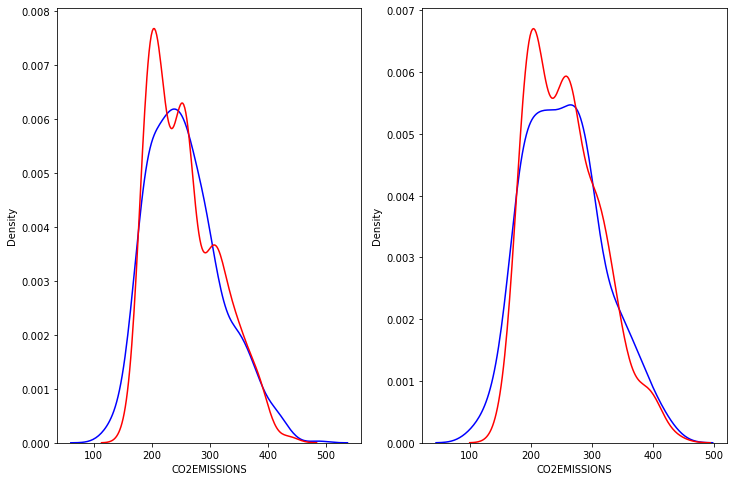

In [26]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
sns.distplot(y_train, color = 'b', label="true-values", hist=False, ax = ax1)
sns.distplot(yhat_train, color='r', label="predicted values", hist= False , ax = ax1)

sns.distplot(y_test, color = 'b', label="true-values", hist=False, ax= ax2)
sns.distplot(yhat_test, color='r', label="predicted values", hist= False , ax = ax2)
plt.show()

As we can see in the second plot,the predictions made by our classifier on the test data is not accurate around the range 200-300 as it varies by a greater extent.



**Cross Validation method**

Now we will use the **cross_calidation_score** and **cross_validation_predict** to evaluate the accuracy and predict respectively using the cross validation approach.

In [24]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

score_cv = cross_val_score(clf,x_train, y_train, cv = 4)
print("Mean Accuracy of training data using 4 folds :",score_cv.mean())

Mean Accuracy of training data using 4 folds : 0.8575498842819289


In [25]:
score_cv = cross_val_score(clf,x_test, y_test, cv = 4)
print("Mean Accuracy of test data using 4 folds :",score_cv.mean())

Mean Accuracy of test data using 4 folds : 0.8676952190198465


Their corresponding Distribution plots are shown below.



c:\Users\Ahmed youssef\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Ahmed youssef\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Ahmed youssef\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

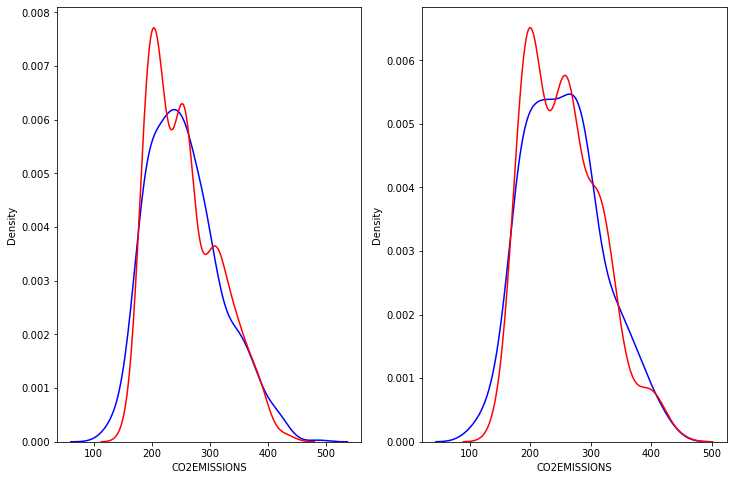

In [27]:
ytest_cv = cross_val_predict(clf,x_test,y_test,cv= 4)
ytrain_cv = cross_val_predict(clf,x_train,y_train,cv =4)

fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
sns.distplot(y_train, color = 'b', label="true-values", hist=False, ax = ax1)
sns.distplot(ytrain_cv, color='r', label="predicted values", hist= False , ax = ax1)

sns.distplot(y_test, color = 'b', label="true-values", hist=False, ax= ax2)
sns.distplot(ytest_cv, color='r', label="predicted values", hist= False , ax = ax2)
plt.show()

**Pipeline**

Since this one is my Favourite as they simplify the steps of processing th data and simultaneously embedding the classifier into it.

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We will form a pipeline, by creating a list of tuples which constitutes the name of the model and its corresponding constructor.



In [29]:
Ip=[('scale',StandardScaler()),('model',LinearRegression())]

In [30]:
pipe=Pipeline(Ip)
pipe.fit(x_train,y_train)
yhat_p = pipe.predict(x_test)
yhat_p[:5]

array([302.42984181, 240.93735507, 272.82303384, 235.25750437,
       204.56928202])

Evaluation
Their testing accuracy i given below.

In [31]:
print(r2_score(yhat_p,y_test))

0.8429526119054329


The corresonding Distribution plot for the test data has been given below:



c:\Users\Ahmed youssef\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Ahmed youssef\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


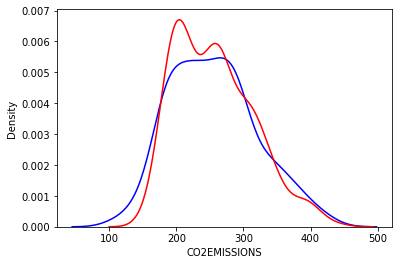

In [34]:
ax = sns.distplot(y_test, color = 'b', label="true-values", hist=False)
sns.distplot(yhat_p, color='r', label="predicted values", hist= False , ax = ax)
plt.show()

# Thanks ❤	